# DSCI 632 Final

Your final is to use the dataset of your choice and the techniques in this class to do the following:

1. Define and describe the dataset (10 points)
1. Clean the data (10 points)
1. Transform the clean data (10 points)
1. Show your analysis of the data (10 points)

## Ground Rules

1. Explain everything you're doing with pyspark in the code cells using [markdown](https://www.markdownguide.org/cheat-sheet) in text cells. Help the reader understand why you're doing each step so they can re-create it. Remember, this is an assignment to show how you analyze data to a potential employer. Don't use code comments to explain things.
1. All of the sections are heading 1 in markdown, so use heading 2 to write your explainations, and heading 3 for any sub-headers. Check in your table of contents view in colab to make sure each point is listed before you turn this in.
1. Don't hesisate to use multiple code/text cells in each section, as long as they're all labeled and described.
1. Assume that the reader doesn't have access to the dataset on your local machine. Provide a link to the dataset you're using, or if able, include code to copy it from a public source. Don't rely on uploading from your local machine. (Importing from Google Drive is ok, as long as you provide the link to the data)
1. If using GCP services, include screenshots from your console if there's a step that you aren't able to re-produce in code. Using the SDK is always preferred, but you won't lose points for using screenshots and explaining them.
1. Import the data ONCE, then transform it to fit your analysis.
1. Don't overwrite data, make new columns for new transformations. You can always drop columns later, but you can't get overwritten values back.
1. Feel free to work with classmates, but all work submitted must be your own.
1. Make sure to run disconnect the runtime and re-run the notebook at least once before turning in. If you are getting certain Java runtime errors, this might also help.

## Extra Credit Opportunities!

- If you provide a link to this notebook on your public GitHub page instead of turning it in as an attachment, you will get 2 points extra credit.
- Extra credit will be given for using the [Google Cloud SDK](https://cloud.google.com/sdk/) to create/use/destroy any cloud resources, up to 2 points per section, 8 points total.
 - Don't be afraid to look at the GCP example colab notebooks from the class notes, the GCP documentation, or GitHub for examples.
- If this notebook is self-contained, you will get 5 points extra credit. (Requirements below)
 - The data is imported without relying on Google Drive, as the paths to data in Google Drive are user-specific. Downloads from public storage buckets/services are fine. (1 point)
 - It be run from start to finish without making any changes to paths, code, or variable names. (1 point)
 - All calls to external services, including GCP, are done programatically, no screenshots explaining how it worked in a browser console. (Using an API or SDK, 2 points)
 - All cloud resources are destroyed at the end of the notebook in a seperate section (Also via API or SDK, 1 point)

---

## Notebook Library Import & Setup

In [1]:
# Install Spark 3.2.4
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.2.4/spark-3.2.4-bin-hadoop2.7.tgz
!tar xf spark-3.2.4-bin-hadoop2.7.tgz

In [2]:
# Set Environment Variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.4-bin-hadoop2.7"

In [3]:
!python -m pip install --upgrade pyspark==2.4.0
!python -m pip install -q findspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.4/213.4 MB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.3/197.3 kB 21.3 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-2.4.0-py2.py3-none-any.whl size=213793580 sha256=f620b8aae4cc7f502124b86769e9c232d6135ab8e5e56b7846d6ea2cb5d96a14
  Stored in directory: /root/.cache/pip/wheels/f7/6f/a8/4d2c26233a51a570ccf015208651aeed4590ed3f935b70e7c6
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


In [4]:
import findspark
findspark.init()

In [5]:
from pyspark.sql import SparkSession

In [6]:
APP_NAME = "FINAL"

In [7]:
spark = SparkSession.builder.appName(APP_NAME).getOrCreate()

In [8]:
spark

If pycountry and pycountry_convert are not installed, the following code will download these libraries. These will be used later in the notebook to assign country codes to string names.

In [9]:
!pip install pycountry
!pip install pycountry_convert

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 6.2 MB/s eta 0:00:00


All datasets are available through my below github public repository. These can be imported directly from the notebook and do not need to be downloaded. They were originally downloaded from Kaggle in the following locations:
- Climate Indicators: https://www.kaggle.com/datasets/tarunrm09/climate-change-indicators
- CO2 Emissions: https://www.kaggle.com/datasets/moazzimalibhatti/co2-emission-by-countries-year-wise-17502022
- World Population: https://www.kaggle.com/datasets/anxods/world-population-and-forecast-dataset?rvi=1

In [10]:
!git clone https://github.com/patrickobrien13/DSCI_632_Final.git

Cloning into 'DSCI_632_Final'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 15 (delta 4), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (15/15), 513.21 KiB | 10.69 MiB/s, done.
Resolving deltas: 100% (4/4), done.


# Section 1: Define and describe the dataset

10 points

Import the dataset, and describe why you'll be analyzing in it. You can summarize a few columns, show a more information on the relavent features, or but help the reader understand what the dataset is, what is in it, and why you picked it.

Some questions that it might help you to answer:
1. Why are you choosing this dataset?
1. What variables will you use?
1. What analysis(es) will you run?
1. Do you have any hypotheses? What are they?

### This section should include one or more of the following:
- A histogram of several features relavent to your analysis
- The schema of the dataset, with the datatypes assigned correctly
- A text cell with explainations of the relavent features in [markdown](https://www.markdownguide.org/cheat-sheet)
- Use Spark SQL or built-in methods to show a range of values
- Most common words/n-grams found

### Import CO2 Emission dataset.

This dataset includes country specific data of CO2 emission by year as well as population and density as of the year 2022. One row corresponds to data from one country from one year.

In [11]:
CO2_emission = spark.read.csv("DSCI_632_Final/CO2_emission_by_countries.csv", header = True, inferSchema = True)
CO2_emission.show(10)

+-----------+----+------------+----+-------------------+----------------+------+----------+------------+
|    Country|Code|Calling Code|Year|CO2 emission (Tons)|Population(2022)|  Area|% of World|Density(km2)|
+-----------+----+------------+----+-------------------+----------------+------+----------+------------+
|Afghanistan|  AF|          93|1750|                0.0|        41128771|652230|     0.40%|      63/km�|
|Afghanistan|  AF|          93|1751|                0.0|        41128771|652230|     0.40%|      63/km�|
|Afghanistan|  AF|          93|1752|                0.0|        41128771|652230|     0.40%|      63/km�|
|Afghanistan|  AF|          93|1753|                0.0|        41128771|652230|     0.40%|      63/km�|
|Afghanistan|  AF|          93|1754|                0.0|        41128771|652230|     0.40%|      63/km�|
|Afghanistan|  AF|          93|1755|                0.0|        41128771|652230|     0.40%|      63/km�|
|Afghanistan|  AF|          93|1756|                0.0

In [12]:
CO2_emission.registerTempTable("CO2_emission")
print("Overview of Dataset:")
CO2_emission.printSchema()
spark.sql("SELECT COUNT(DISTINCT(Country)) AS Number_of_Distinct_Countries FROM CO2_emission").show()
spark.sql("SELECT MAX(Year) AS Max_Year, MIN(Year) AS Min_Year FROM CO2_emission").show()
print("*** Top 10 Countries by Population ***")
spark.sql("SELECT DISTINCT Country, `Population(2022)` AS Population_Count FROM CO2_emission ORDER BY Population_Count DESC").show(10)
print("*** Top 10 Countries by Max CO2 Emissions ***")
spark.sql("SELECT DISTINCT Country, MAX(`CO2 emission (Tons)`) AS C02_Emission FROM CO2_emission GROUP BY Country ORDER BY C02_Emission DESC").show(10)

/content/spark-3.2.4-bin-hadoop2.7/python/pyspark/sql/dataframe.py:138: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn(


Overview of Dataset:
root
 |-- Country: string (nullable = true)
 |-- Code: string (nullable = true)
 |-- Calling Code: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- CO2 emission (Tons): double (nullable = true)
 |-- Population(2022): integer (nullable = true)
 |-- Area: integer (nullable = true)
 |-- % of World: string (nullable = true)
 |-- Density(km2): string (nullable = true)

+----------------------------+
|Number_of_Distinct_Countries|
+----------------------------+
|                         220|
+----------------------------+

+--------+--------+
|Max_Year|Min_Year|
+--------+--------+
|    2020|    1750|
+--------+--------+

*** Top 10 Countries by Population ***
+-------------+----------------+
|      Country|Population_Count|
+-------------+----------------+
|        China|      1425887337|
|        India|      1417173173|
|United States|       338289857|
|    Indonesia|       275501339|
|     Pakistan|       235824862|
|      Nigeria|       218541212|
|

### Import Climate indicators dataset.

This dataset includes country specific yearly increases in temperature. One row corresponds to one country with columns representing the yearly increase in temperature. As seen below, the year columns range from 1961 to 2022 and each year name begins with the letter F.

In [13]:
climate_indicators = spark.read.csv("DSCI_632_Final/long_format_annual_surface_temp.csv", header = True, inferSchema = True)
climate_indicators.show(10)

+--------------------+----+-----+-----------+
|             Country|ISO2| Year|Temperature|
+--------------------+----+-----+-----------+
|Afghanistan, Isla...|  AF|F1961|     -0.113|
|             Albania|  AL|F1961|      0.627|
|             Algeria|  DZ|F1961|      0.164|
|      American Samoa|  AS|F1961|      0.079|
|Andorra, Principa...|  AD|F1961|      0.736|
|              Angola|  AO|F1961|      0.041|
|            Anguilla|  AI|F1961|      0.086|
| Antigua and Barbuda|  AG|F1961|       0.09|
|           Argentina|  AR|F1961|      0.122|
|           Australia|  AU|F1961|      0.157|
+--------------------+----+-----+-----------+
only showing top 10 rows



In [14]:
print("Overview of Dataset:")
climate_indicators.registerTempTable("climate_indicators")
climate_indicators.printSchema()
spark.sql("SELECT MAX(Year) AS Max_Year, MIN(Year) AS Min_Year FROM climate_indicators").show()
spark.sql("SELECT COUNT(DISTINCT(Country)) AS Number_of_Distinct_Countries FROM climate_indicators").show()
print("*** Top 10 Highest Temperature Increases ***")
spark.sql("SELECT Country, Year, Temperature FROM climate_indicators ORDER BY Temperature DESC").show(10)

Overview of Dataset:
root
 |-- Country: string (nullable = true)
 |-- ISO2: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Temperature: double (nullable = true)

+--------+--------+
|Max_Year|Min_Year|
+--------+--------+
|   F2022|   F1961|
+--------+--------+

+----------------------------+
|Number_of_Distinct_Countries|
+----------------------------+
|                         181|
+----------------------------+

*** Top 10 Highest Temperature Increases ***
+--------------------+-----+-----------+
|             Country| Year|Temperature|
+--------------------+-----+-----------+
|             Finland|F2020|      3.317|
|Andorra, Principa...|F2022|      3.243|
|           Greenland|F2010|      3.058|
|              Sweden|F2020|      2.943|
|              France|F2022|      2.929|
|              Canada|F2010|      2.915|
|         Switzerland|F2022|      2.798|
|              Monaco|F2022|      2.737|
|            Mongolia|F2007|      2.729|
|                Iraq|F20

### Import Population Information dataset.

This last dataset includes country specific population information by year. One row corresponds to one country with columns containing data on the country population for the respective year. In the brief overview below, we can see that not every year is included in this dataset - every fifth year appears to be consistently reported.

In [15]:
world_population = spark.read.csv("DSCI_632_Final/world_population.csv", header = True, inferSchema = True)
world_population.show(10)

+-----------+----+----------+-----------------+--------------+--------------+----------+--------------+---------------+------------+----------------+-----------------------------+----------------+----+
|    country|Year|Population|Yearly %   Change|Yearly  Change|Migrants (net)|Median Age|Fertility Rate|Density (P/Km²)|Urban  Pop %|Urban Population|Country's Share of  World Pop|World Population|Rank|
+-----------+----+----------+-----------------+--------------+--------------+----------+--------------+---------------+------------+----------------+-----------------------------+----------------+----+
|Afghanistan|2020|  38928346|           2.33 %|        886592|      -62920.0|      18.4|          4.56|             60|      25.4 %|         9904337|                       0.50 %|      7794798739|  37|
|Afghanistan|2019|  38041754|           2.34 %|        869833|      -62920.0|      17.4|          5.26|             58|      25.2 %|         9582625|                       0.49 %|      7713468

In [16]:
print("Overview of Dataset:")
world_population.registerTempTable("world_population")
world_population.printSchema()
spark.sql("SELECT MAX(Year) AS Max_Year, MIN(Year) AS Min_Year FROM world_population").show()
spark.sql("SELECT COUNT(DISTINCT(Country)) AS Number_of_Distinct_Countries FROM world_population").show()

Overview of Dataset:
root
 |-- country: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Population: integer (nullable = true)
 |-- Yearly %   Change: string (nullable = true)
 |-- Yearly  Change: integer (nullable = true)
 |-- Migrants (net): double (nullable = true)
 |-- Median Age: double (nullable = true)
 |-- Fertility Rate: double (nullable = true)
 |-- Density (P/Km²): integer (nullable = true)
 |-- Urban  Pop %: string (nullable = true)
 |-- Urban Population: string (nullable = true)
 |-- Country's Share of  World Pop: string (nullable = true)
 |-- World Population: long (nullable = true)
 |-- Rank: integer (nullable = true)

+--------+--------+
|Max_Year|Min_Year|
+--------+--------+
|    2020|    1955|
+--------+--------+

+----------------------------+
|Number_of_Distinct_Countries|
+----------------------------+
|                         235|
+----------------------------+



After a brief overview and exploration of the above datasets we can see that two of the datasets can be merged together by year and ISO2/Code abbreviations. This will need to be derived for the population dataset. The Year variable will need to me modified to have matching format and type before this can be merged. Additionally, we have found a difference of around 50 countries that exist in one of our datasets, but not in the others. We will need to identify these countries and determine how to best handle these in our merged dataset. Lastly, our range of years in each dataset span a different lengths of time so these will need to be subset to the same size.

# Section 2: Clean the data

10 points

Not every dataset is going to be ready to use right away. Take steps to fix incorrect inputs, remove null values, and assign datatypes that fit each feature.

### This section should include one or more of the following:
- A count of rows before and after dropping data with null or incorrect values, including an explaination of why removing the rows was necessary in [markdown](https://www.markdownguide.org/cheat-sheet).
- Renaming a column, adding a new one, or casting an existing one as a different datatype.
- Remove punctuation marks, symbols, etc from the data, and convert all upper-case lettering to lower-case.
- Remove or fix rows that have bad values/data.

## Clean and format CO2 dataset

We start cleaning up our CO2 dataset by dropping the columns that we will not need in our analysis. These rows are either static across all years or are repeated in a dataset that will be merged with later on. Next, we rename our variables to simplify the merge process as increase ease of use later on by removing special characters and spaces. Lastly, since our population dataset only has consistent data every 5 years, we filter our dataset down to every fifth year from 1965-2020. This represents a range of data that is common across all three of our datasets.

In [17]:
from pyspark.sql.functions import col, substring
CO2_emission_dropped = CO2_emission.drop("Population(2022)", "% of World", "Density(km2)", "Calling Code", "Country")
CO2_emission_renamed = CO2_emission_dropped.withColumnRenamed("Code", "ISO2").withColumnRenamed("CO2 emission (Tons)", "CO2_emission")
CO2_emission_subset = CO2_emission_renamed.filter((col("Year") >= 1965) & (col("Year") <= 2020) & (col("Year") % 5 == 0))
CO2_emission_subset.show(10)

+----+----+------------+------+
|ISO2|Year|CO2_emission|  Area|
+----+----+------------+------+
|  AF|1965|   5984660.0|652230|
|  AF|1970| 1.2192704E7|652230|
|  AF|1975| 2.1286594E7|652230|
|  AF|1980| 3.1793984E7|652230|
|  AF|1985| 4.4709944E7|652230|
|  AF|1990| 5.9182404E7|652230|
|  AF|1995| 6.6834352E7|652230|
|  AF|2000|  7.167974E7|652230|
|  AF|2005| 7.6907696E7|652230|
|  AF|2010|1.00148964E8|652230|
+----+----+------------+------+
only showing top 10 rows



## Clean and format Climate Indicators dataset

To begin cleaning our Climate Indicators dataset will begin by removing the "F" before each year in our Year column and will also update this variable type to be an integer instead of a string. We will then need to determine if there are any Null values in the dataset. We will also repeat similar drop, rename, and filter steps mentioned above.

In [18]:
climate_indicators_format = climate_indicators.withColumn("Year", substring(col("Year"), 2, 4).cast("int"))
climate_indicators_format.printSchema()

root
 |-- Country: string (nullable = true)
 |-- ISO2: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Temperature: double (nullable = true)



In [19]:
climate_indicators_dropped = climate_indicators_format.drop("Country")
climate_indicators_subset = climate_indicators_dropped.filter((col("Year") >= 1965) & (col("Year") <= 2020) & (col("Year") % 5 == 0))
climate_indicators_subset.show(10)

+----+----+-----------+
|ISO2|Year|Temperature|
+----+----+-----------+
|  AF|1965|     -0.244|
|  AL|1965|     -0.388|
|  DZ|1965|       -0.1|
|  AS|1965|     -0.562|
|  AD|1965|      -0.49|
|  AO|1965|     -0.196|
|  AI|1965|     -0.365|
|  AG|1965|     -0.385|
|  AR|1965|       0.09|
|  AU|1965|       0.14|
+----+----+-----------+
only showing top 10 rows



In [20]:
print("# of rows in current dataset:\n", climate_indicators_subset.count())
print("# of rows in null-removed dataset:\n", climate_indicators_subset.dropna().count())
print("No Null values found!")

# of rows in current dataset:
 2172
# of rows in null-removed dataset:
 2172
No Null values found!


## Clean and format World Population dataset

The world population dataset unfortunately does not have ISO2 codes included for each country. This is where the pycountry comes in its ability to input a string country name and it will return the ISO2 code for the country. We create a UDF here that will simplify this process and then apply it to the data frame. The end result is the ISO2 column included as a column in this dataset. This is important since it is what we will use to merge all 3 datasets. This pycountry function is not perfect and left a few ISO2 codes empty, so we ad hoc fill in these values below. This occurred in rather small and lesser known countries.

In [21]:
from pyspark.sql.functions import udf, when, collect_set
from pyspark.sql.types import *
import pycountry

def add_iso2(country):
    try:
        country = pycountry.countries.lookup(country)
        return country.alpha_2
    except LookupError:
        return None

iso2_udf = udf(add_iso2, StringType())
world_population_iso2 = world_population.withColumn("ISO2", iso2_udf(col("country")))

# Ad hoc entry of country codes pycountry did not pick up
world_population_iso2_filled1 = world_population_iso2.withColumn("ISO2", when(col("country") == "Brunei", "BN").otherwise(col("ISO2")))
world_population_iso2_filled2 = world_population_iso2_filled1.withColumn("ISO2", when(col("country") == "Democratic Republic Of The Congo", "CD").otherwise(col("ISO2")))
world_population_iso2_filled3 = world_population_iso2_filled2.withColumn("ISO2", when(col("country") == "Guinea Bissau", "GW").otherwise(col("ISO2")))
world_population_iso2_filled4 = world_population_iso2_filled3.withColumn("ISO2", when(col("country") == "Wallis And Futuna Islands", "WF").otherwise(col("ISO2")))

Similar to before, we will be renaming & removing unnecessary variables. Once again, sub setting the dataset to every 5th year between 1965 & 2020.

In [22]:
world_population_dropped = world_population_iso2_filled4.drop("Rank", "Migrants (net)", "Country's Share of  World Pop", "Yearly %   Change", "Yearly  Change", "Urban  Pop %", "Fertility Rate")
world_population_renamed = world_population_dropped.withColumnRenamed("Median Age", "Median_Age").withColumnRenamed("Density (P/Km²)", "Density").withColumnRenamed("Urban Population", "Urban_pop").withColumnRenamed("World Population", "World_pop")
world_population_subset = world_population_renamed.filter((col("Year") >= 1965) & (col("Year") <= 2020) & (col("Year") % 5 == 0))
world_population_subset.show(10)

+-----------+----+----------+----------+-------+---------+----------+----+
|    country|Year|Population|Median_Age|Density|Urban_pop| World_pop|ISO2|
+-----------+----+----------+----------+-------+---------+----------+----+
|Afghanistan|2020|  38928346|      18.4|     60|  9904337|7794798739|  AF|
|Afghanistan|2015|  34413603|      17.2|     53|  8367571|7379797139|  AF|
|Afghanistan|2010|  29185507|      15.9|     45|  6836980|6956823603|  AF|
|Afghanistan|2005|  25654277|      16.0|     39|  5691836|6541907027|  AF|
|Afghanistan|2000|  20779953|      15.5|     32|  4436282|6143493823|  AF|
|Afghanistan|1995|  18110657|      16.0|     28|  3697570|5744212979|  AF|
|Afghanistan|1990|  12412308|      15.8|     19|  2593947|5327231061|  AF|
|Afghanistan|1985|  11938208|      16.2|     18|  2238468|4870921740|  AF|
|Afghanistan|1980|  13356511|      16.9|     20|  2119078|4458003514|  AF|
|Afghanistan|1975|  12689160|      17.3|     19|  1717422|4079480606|  AF|
+-----------+----+-------

## Merge our three cleaned datasets together

Using an inner join to ensure common matches between both tables, we merge based on the country abbreviation (ISO2) and Year. After the merge, we are left with around 1900 rows of data. If we remove all rows will null values, we have 1740 rows remaining. This was expected and not a surprise since our smallest dataset initially had around 2100 rows and two of the three datasets had null values to begin with.

In [23]:
join_col = ["ISO2", "Year"]
climate_CO2_merge = climate_indicators_subset.join(CO2_emission_subset, on=join_col, how="inner")
climate_CO2_pop_merge = climate_CO2_merge.join(world_population_subset, on=join_col, how="inner")
climate_CO2_pop_merge.show(10)

+----+----+-----------+------------+------+-----------+----------+----------+-------+---------+----------+
|ISO2|Year|Temperature|CO2_emission|  Area|    country|Population|Median_Age|Density|Urban_pop| World_pop|
+----+----+-----------+------------+------+-----------+----------+----------+-------+---------+----------+
|  AF|1965|     -0.244|   5984660.0|652230|Afghanistan|   9956320|      18.4|     15|   984350|3339583597|
|  AF|1970|      0.813| 1.2192704E7|652230|Afghanistan|  11173642|      17.9|     17|  1295433|3700437046|
|  AF|1975|     -0.445| 2.1286594E7|652230|Afghanistan|  12689160|      17.3|     19|  1717422|4079480606|
|  AF|1980|        0.6| 3.1793984E7|652230|Afghanistan|  13356511|      16.9|     20|  2119078|4458003514|
|  AF|1985|      0.283| 4.4709944E7|652230|Afghanistan|  11938208|      16.2|     18|  2238468|4870921740|
|  AF|1990|       0.73| 5.9182404E7|652230|Afghanistan|  12412308|      15.8|     19|  2593947|5327231061|
|  AF|1995|      0.359| 6.6834352E7|6

In [24]:
print("CO2 population rows:\t\t", CO2_emission_subset.count())
print("Climate population rows:\t", climate_indicators_subset.count())
print("World population rows:\t\t", world_population_subset.count())
print("Merged population rows:\t\t", climate_CO2_pop_merge.count())

CO2 population rows:		 2640
Climate population rows:	 2172
World population rows:		 2786
Merged population rows:		 1932


In [25]:
null_rows_Area = climate_CO2_pop_merge.filter(climate_CO2_pop_merge["Area"].isNull())
null_rows_Median_Age = climate_CO2_pop_merge.filter(climate_CO2_pop_merge["Median_Age"].isNull())
final_merged = climate_CO2_pop_merge.dropna()
print("Area Null Values:\t", null_rows_Area.count())
print("Age Null Values:\t", null_rows_Median_Age.count())
print("Final Non-Null Dataset:\t", final_merged.count())

Area Null Values:	 71
Age Null Values:	 132
Final Non-Null Dataset:	 1740


# Section 3: Transform the clean data

10 points

Once you have clean data, start to prepare it to fit your analysis tools. This might mean using custom code to normalize certain values, joining supplemental datasets, and/or preparing it for machine learning.

### This section should include one or more of the following:
- Write a UDF to perform a function, then use it to add a new column to your data. Explain why in [markdown](https://www.markdownguide.org/cheat-sheet)
- Join an outside data source. (It can be one you've prepared alongside the primary source you're using, as long as you link it)
- Split the data into train/test sets
- Create vectors for relavent features
- One-hot encode catagorical variables

First, we will create two variables that represent the % of the world population each country makes up as well as what percent of the country lives in an urban setting. This is done using a UDF called calculate_PCT and takes in two arguments and returns the percent one argument makes up of the other. This UDF is general enough to calculate the urban population percentage and world population percentage.

In [26]:
def calculate_PCT(population, total_pop):
    return population / total_pop * 100

calculate_PCT_udf = udf(calculate_PCT, IntegerType())

final_merged_pct = final_merged.withColumn("world_pop_pct", calculate_PCT(col("Population"), col("World_pop"))).withColumn("urban_pop_pct", calculate_PCT(col("Urban_pop"), col("Population")))
final_merged_pct = final_merged_pct.drop("Urban_pop", "World_pop", "Population")
final_merged_pct.show(10)

+----+----+-----------+------------+------+-----------+----------+-------+-------------------+------------------+
|ISO2|Year|Temperature|CO2_emission|  Area|    country|Median_Age|Density|      world_pop_pct|     urban_pop_pct|
+----+----+-----------+------------+------+-----------+----------+-------+-------------------+------------------+
|  AF|1965|     -0.244|   5984660.0|652230|Afghanistan|      18.4|     15|0.29813058157741334| 9.886685040255838|
|  AF|1970|      0.813| 1.2192704E7|652230|Afghanistan|      17.9|     17|  0.301954657276988|11.593650485669757|
|  AF|1975|     -0.445| 2.1286594E7|652230|Afghanistan|      17.3|     19|0.31104842075574757|13.534560207295046|
|  AF|1980|        0.6| 3.1793984E7|652230|Afghanistan|      16.9|     20| 0.2996074578688634|15.865505594986596|
|  AF|1985|      0.283| 4.4709944E7|652230|Afghanistan|      16.2|     18|0.24509135307930444|18.750452329193795|
|  AF|1990|       0.73| 5.9182404E7|652230|Afghanistan|      15.8|     19|0.232997365007

Next, we will add a categorical "region" variable to the dataset using pycountry. Since we already cleaned up the ISO2 country coding previously, we will be pulling the region based on this column. Otherwise, we may run into the same issues as above where pycountry doesn't fully recognize the full text variable of country name. We are also adding ISO3 coding since this is needed to match with a geopandas file we will merge with in our cluster analysis. Similar to before, these new columns are added by use of two UDFs.

In [27]:
import pycountry_convert as pc

def get_region(country_ISO2):
    try:
        country_continent_code = pc.country_alpha2_to_continent_code(country_ISO2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        return country_continent_name
    except LookupError:
        return None

def get_ISO3(ISO2_code):
    try:
        country = pycountry.countries.get(alpha_2=ISO2_code)
        return country.alpha_3
    except KeyError:
        return None


get_region_udf = udf(get_region, StringType())
get_iso3_udf = udf(get_ISO3, StringType())
df_with_region_ISO3 = final_merged_pct.withColumn("ISO3", get_iso3_udf(col("ISO2")))
df_with_region = df_with_region_ISO3.withColumn("region", get_region_udf(col("ISO2")))
df_with_region.show(10)

+----+----+-----------+------------+------+-----------+----------+-------+-------------------+------------------+----+------+
|ISO2|Year|Temperature|CO2_emission|  Area|    country|Median_Age|Density|      world_pop_pct|     urban_pop_pct|ISO3|region|
+----+----+-----------+------------+------+-----------+----------+-------+-------------------+------------------+----+------+
|  AF|1965|     -0.244|   5984660.0|652230|Afghanistan|      18.4|     15|0.29813058157741334| 9.886685040255838| AFG|  Asia|
|  AF|1970|      0.813| 1.2192704E7|652230|Afghanistan|      17.9|     17|  0.301954657276988|11.593650485669757| AFG|  Asia|
|  AF|1975|     -0.445| 2.1286594E7|652230|Afghanistan|      17.3|     19|0.31104842075574757|13.534560207295046| AFG|  Asia|
|  AF|1980|        0.6| 3.1793984E7|652230|Afghanistan|      16.9|     20| 0.2996074578688634|15.865505594986596| AFG|  Asia|
|  AF|1985|      0.283| 4.4709944E7|652230|Afghanistan|      16.2|     18|0.24509135307930444|18.750452329193795| AFG|

In preparation for analysis, we will use a pipeline to finalize a dataset with appropriate variable coding and feature vectors. StringIndexer, OneHotEncoder, and VectorAssembler are all used in the data transformation pipeline.

In [28]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler

# StringIndexer is used to convert categorical variables into numerical indices
df_with_region_nomiss = df_with_region.dropna()
string_cols = ["region"]
indexing = [StringIndexer(inputCol=column, outputCol=column+"_index").fit(df_with_region_nomiss) for column in string_cols]

# OneHotEncoder
one_hot_encoding = [OneHotEncoder(inputCol=column+"_index", outputCol=column+"_encoded") for column in string_cols]

# VectorAssembler combines the selected columns into a single vector column
feature_cols = ['region_index', 'Year', 'Temperature', 'Area', 'Median_Age', 'Density', 'world_pop_pct', 'urban_pop_pct']
assembler = [VectorAssembler(inputCols=feature_cols, outputCol='features')]

stages = indexing + one_hot_encoding + assembler
pipeline = Pipeline(stages=stages)
final_transformed = pipeline.fit(df_with_region_nomiss).transform(df_with_region_nomiss)

final_transformed.show(5, truncate=False)

+----+----+-----------+------------+------+-----------+----------+-------+-------------------+------------------+----+------+------------+--------------+-----------------------------------------------------------------------------+
|ISO2|Year|Temperature|CO2_emission|Area  |country    |Median_Age|Density|world_pop_pct      |urban_pop_pct     |ISO3|region|region_index|region_encoded|features                                                                     |
+----+----+-----------+------------+------+-----------+----------+-------+-------------------+------------------+----+------+------------+--------------+-----------------------------------------------------------------------------+
|AF  |1965|-0.244     |5984660.0   |652230|Afghanistan|18.4      |15     |0.29813058157741334|9.886685040255838 |AFG |Asia  |1.0         |(5,[1],[1.0]) |[1.0,1965.0,-0.244,652230.0,18.4,15.0,0.29813058157741334,9.886685040255838] |
|AF  |1970|0.813      |1.2192704E7 |652230|Afghanistan|17.9      |17    

In [29]:
#Sample of feature vectors
final_transformed.select('features').take(5)

[Row(features=DenseVector([1.0, 1965.0, -0.244, 652230.0, 18.4, 15.0, 0.2981, 9.8867])),
 Row(features=DenseVector([1.0, 1970.0, 0.813, 652230.0, 17.9, 17.0, 0.302, 11.5937])),
 Row(features=DenseVector([1.0, 1975.0, -0.445, 652230.0, 17.3, 19.0, 0.311, 13.5346])),
 Row(features=DenseVector([1.0, 1980.0, 0.6, 652230.0, 16.9, 20.0, 0.2996, 15.8655])),
 Row(features=DenseVector([1.0, 1985.0, 0.283, 652230.0, 16.2, 18.0, 0.2451, 18.7505]))]

Our final step before analysis is to split the data into train and test groups. An important consideration when working with data that includes a time factor (Year), is to try an eliminate data leakage. For example, if we are looking to predict the CO2 Emissions for the year 1995, but we train the model on years 1990, 2000, 2005, and 2010 this may lead to a very well fit model that does well in testing, but would fail in the real world since this future data would not be available in real application. For this reason, we split our datasets chronologically, with ~80% of the older Year range as training and ~20% of the most recent Years as testing. We will be looking at a variety of subsets of the data to see how the model will perform on different scopes / regions / countries. Namely, we will focus on Europe(Norway) and Asia(China). From our historical knowledge, these will likely show differing results.

In [30]:
#World
train_df_World = final_transformed.filter((col('year') <= 2005))
test_df_World = final_transformed.filter((col('year') > 2005))

#Europe
train_df_Europe = final_transformed.filter((col('year') <= 2005) & (col('region') == 'Europe'))
test_df_Europe = final_transformed.filter((col('year') > 2005) & (col('region') == 'Europe'))

#Norway
train_df_NO = final_transformed.filter((col('year') <= 2005) & (col('ISO2') == 'NO'))
test_df_NO = final_transformed.filter((col('year') > 2005) & (col('ISO2') == 'NO'))

#Asia
train_df_Asia = final_transformed.filter((col('year') <= 2005) & (col('region') == 'Asia'))
test_df_Asia = final_transformed.filter((col('year') > 2005) & (col('region') == 'Asia'))

#China
train_df_CN = final_transformed.filter((col('year') <= 2005) & (col('ISO2') == 'CN'))
test_df_CN = final_transformed.filter((col('year') > 2005) & (col('ISO2') == 'CN'))

# Section 4: Show your analysis of the data

10 points

This is where the science happens. Use your data to show some kind of insight, and how you got there. Make the reader understand why it's important, and how they can get the same conslusion, and/or what would need to change to reach a different one.

### This section should include one or more of the following:
- Fit the data to a model
- Show the outcome of clustering, regression, and/or classification algorithms.
 - We used several in class, but you can use whatever fits your needs for this assignment
- Reccomend a product/item
- Use a SQL query to filter results


### Regression Analysis

Beginning with Regression Analysis, we will explore the ability of our feature variables to predict future CO2 emissions. We begin with doing so across the entire dataset and then slowly narrow in our scope to region and then finally to country. We use RMSE and R-squared values to determine the fit of the model.

In [31]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

lr = LinearRegression(featuresCol='features', labelCol='CO2_emission')

print("*** Regression Model Fit: World  ***")
lr_model_World = lr.fit(train_df_World)
predictions_World = lr_model_World.transform(test_df_World)
evaluator = RegressionEvaluator(labelCol="CO2_emission", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions_World)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)
r2 = evaluator.evaluate(predictions_World, {evaluator.metricName: "r2"})
print("R-squared:", r2, "\n\n")

print("*** Regression Model Fit: Europe  ***")
lr_model_Europe = lr.fit(train_df_Europe)
predictions_Europe = lr_model_Europe.transform(test_df_Europe)
evaluator = RegressionEvaluator(labelCol="CO2_emission", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions_Europe)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)
r2 = evaluator.evaluate(predictions_Europe, {evaluator.metricName: "r2"})
print("R-squared:", r2, "\n")

print("*** Regression Model Fit: Norway  ***")
lr_model_NO = lr.fit(train_df_NO)
predictions_NO = lr_model_NO.transform(test_df_NO)
evaluator = RegressionEvaluator(labelCol="CO2_emission", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions_NO)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)
r2 = evaluator.evaluate(predictions_NO, {evaluator.metricName: "r2"})
print("R-squared:", r2, "\n\n")

print("*** Regression Model Fit: Asia  ***")
lr_model_Asia = lr.fit(train_df_Asia)
predictions_Asia = lr_model_Asia.transform(test_df_Asia)
evaluator = RegressionEvaluator(labelCol="CO2_emission", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions_Asia)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)
r2 = evaluator.evaluate(predictions_Asia, {evaluator.metricName: "r2"})
print("R-squared:", r2, "\n")

print("*** Regression Model Fit: China  ***")
lr_model_CN = lr.fit(train_df_CN)
predictions_CN = lr_model_CN.transform(test_df_CN)
evaluator = RegressionEvaluator(labelCol="CO2_emission", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions_CN)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)
r2 = evaluator.evaluate(predictions_CN, {evaluator.metricName: "r2"})
print("R-squared:", r2, "\n")

*** Regression Model Fit: World  ***
Root Mean Squared Error (RMSE) on test data = 3.15307e+10
R-squared: 0.306784029715106 


*** Regression Model Fit: Europe  ***
Root Mean Squared Error (RMSE) on test data = 1.58148e+10
R-squared: 0.544417490538007 

*** Regression Model Fit: Norway  ***
Root Mean Squared Error (RMSE) on test data = 8.85435e+06
R-squared: 0.9975954440079612 


*** Regression Model Fit: Asia  ***
Root Mean Squared Error (RMSE) on test data = 2.68763e+10
R-squared: 0.3894101598325046 

*** Regression Model Fit: China  ***
Root Mean Squared Error (RMSE) on test data = 4.77919e+10
R-squared: -0.3430431852660023 



When looking at our Linear Regression Model performance, we can see that the country specific training / testing is by far the best fitted model in the case of Norway / Europe. However, China / Asia actually had a better fitted model when training and testing on the region as a whole. In general, we should not expect the region specific model to perform that well since it is trained on a large variety of countries and the CO2 emissions are unique to each country. In future use, I wouldn't recommend using linear regression to predict CO2 emissions for anything more broad that country specific emissions.

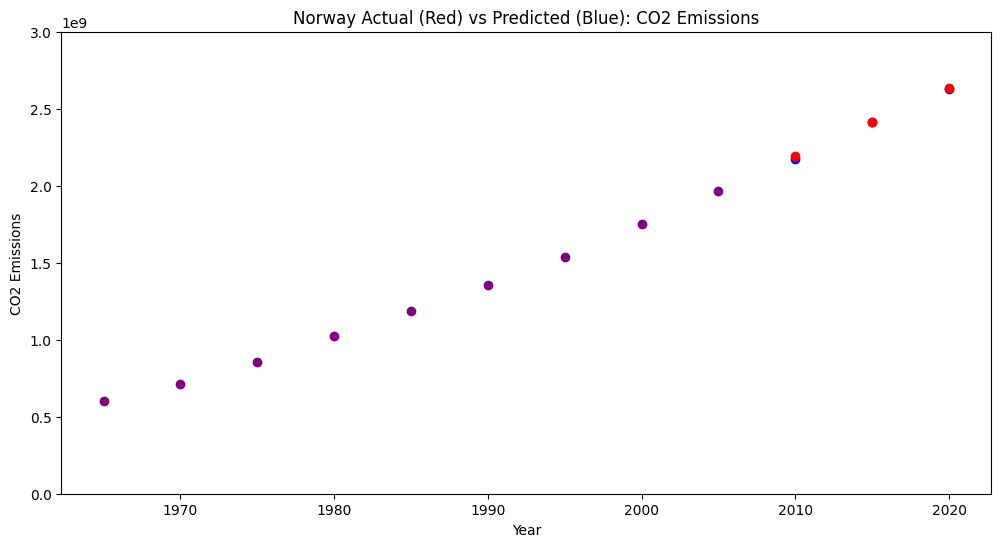

In [32]:
import matplotlib.pyplot as plt

#Norway
test_actual_values = predictions_NO.select("CO2_emission").collect()
predicted_values = predictions_NO.select("prediction").collect()
test_year_values = predictions_NO.select("Year").collect()

train_actual_values = train_df_NO.select("CO2_emission").collect()
train_year_values = train_df_NO.select("Year").collect()

test_actual_values = [row['CO2_emission'] for row in test_actual_values]
predicted_values = [row['prediction'] for row in predicted_values]
test_year_values = [row['Year'] for row in test_year_values]

train_actual_values = [row['CO2_emission'] for row in train_actual_values]
train_year_values = [row['Year'] for row in train_year_values]

plt.figure(figsize=(12, 6))
plt.scatter(test_year_values, predicted_values, color='blue')
plt.scatter(test_year_values, test_actual_values, color='red')
plt.scatter(train_year_values, train_actual_values, color='purple')
plt.title('Norway Actual (Red) vs Predicted (Blue): CO2 Emissions')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.ylim(0, 3000000000)
plt.show()

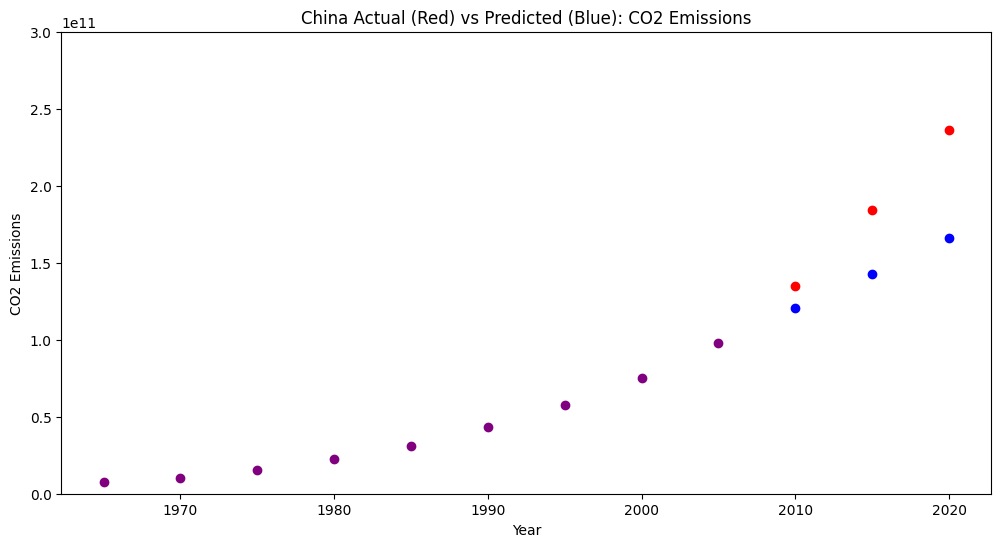

In [33]:
#China
test_actual_values = predictions_CN.select("CO2_emission").collect()
predicted_values = predictions_CN.select("prediction").collect()
test_year_values = predictions_CN.select("Year").collect()

train_actual_values = train_df_CN.select("CO2_emission").collect()
train_year_values = train_df_CN.select("Year").collect()

test_actual_values = [row['CO2_emission'] for row in test_actual_values]
predicted_values = [row['prediction'] for row in predicted_values]
test_year_values = [row['Year'] for row in test_year_values]

train_actual_values = [row['CO2_emission'] for row in train_actual_values]
train_year_values = [row['Year'] for row in train_year_values]

plt.figure(figsize=(12, 6))
plt.scatter(test_year_values, predicted_values, color='blue')
plt.scatter(test_year_values, test_actual_values, color='red')
plt.scatter(train_year_values, train_actual_values, color='purple')
plt.title('China Actual (Red) vs Predicted (Blue): CO2 Emissions')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.ylim(0, 300000000000)
plt.show()

In the above predictions, we can see why the r-squared and rmse scores for the China CO2 emission LR model reflected a poor fit. After the year 2000, it looks like CO2 emissions began to rise more exponentially in comparison to the prior 35 years. Norway had a well fitted LR model for CO2 emission, and we can see that the trend has been very linear increasing since 1965.

### Cluster Analysis

Next, we will explore cluster analysis and visualize the outcomes of our clustering. This gives us a unique perspective of what countries are both similar to one another while simultaneously being dissimilar to the other clusters. Since our dataset has one row for every 5 years, it would do us little good to cluster across the entire dataset since that would likely give us a bunch of clusters of the same countries with different years. Instead, we will subset the data once again to two specific years so that each dataset will only have one row of each country. Then we will be able to observe the similar clusters of countries in that specific year.

In [34]:
from pyspark.ml.clustering import KMeans

train_df_World_2020 = final_transformed.filter((col('year') == 2020))
train_df_World_1965 = final_transformed.filter((col('year') == 1965))


columns_to_check = ['region_index', 'Year', 'Temperature', 'Area', 'Median_Age', 'Density', 'world_pop_pct', 'urban_pop_pct']

filtered_df_2020 = train_df_World_2020.na.drop(subset=columns_to_check)
filtered_df_1965 = train_df_World_1965.na.drop(subset=columns_to_check)

kmeans = KMeans().setK(3).setSeed(1)

In [39]:
#This Step Occasionally will have an RDD processing Issue
#Running it over will usually resolve issue
model_2020 = kmeans.fit(filtered_df_2020.select("features"))
model_1965 = kmeans.fit(filtered_df_1965.select("features"))

In [40]:
clustered_df_2020 = model_2020.transform(filtered_df_2020)
clustered_df_1965 = model_1965.transform(filtered_df_1965)

cluster_panda_df_2020 = clustered_df_2020.select("ISO3", "prediction").toPandas()
cluster_panda_df_1965 = clustered_df_1965.select("ISO3", "prediction").toPandas()

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

merged_geo_df_2020 = world.merge(cluster_panda_df_2020, left_on='iso_a3', right_on='ISO3', how='inner')
merged_geo_df_1965 = world.merge(cluster_panda_df_1965, left_on='iso_a3', right_on='ISO3', how='inner')

merged_geo_df_2020_sort = merged_geo_df_2020.sort_values(by='prediction')
merged_geo_df_1965_sort = merged_geo_df_1965.sort_values(by='prediction')

vmin = min(merged_geo_df_2020_sort["prediction"].min(), merged_geo_df_1965_sort["prediction"].min())
vmax = max(merged_geo_df_2020_sort["prediction"].max(), merged_geo_df_1965_sort["prediction"].max())

<ipython-input-40-c0a633d2937a>:12: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


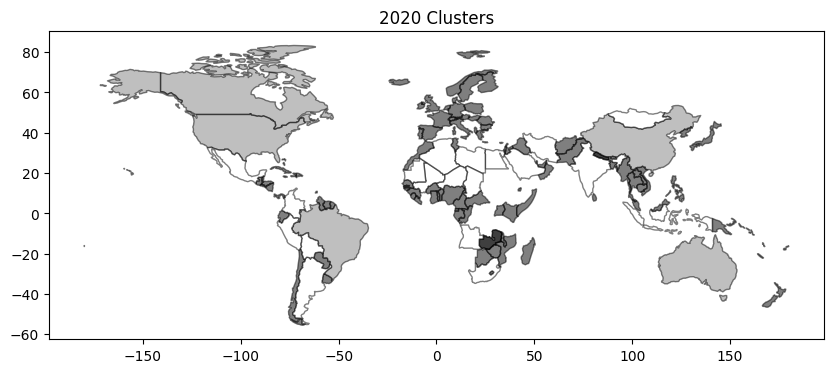

In [41]:
fig1 = plt.figure(figsize=(10, 5))
ax1 = fig1.add_subplot()

merged_geo_df_2020_sort.plot(ax=ax1, column="prediction", cmap="gray", edgecolor="black", alpha=0.5, vmin=vmin, vmax=vmax)
plt.title("2020 Clusters")
plt.show()

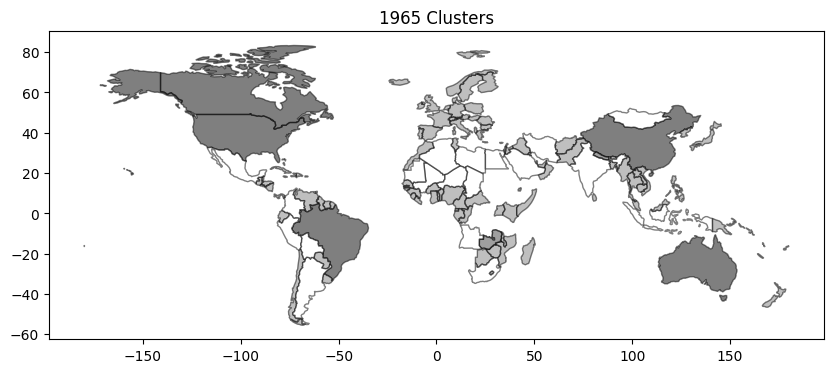

In [42]:
fig2 = plt.figure(figsize=(10, 5))
ax2 = fig2.add_subplot()

merged_geo_df_1965_sort.plot(ax=ax2, column="prediction", cmap="gray", edgecolor="black", alpha=0.5, vmin=vmin, vmax=vmax)
plt.title("1965 Clusters")
plt.show()

The above clusters from 1965 and 2020 do not show much difference in grouping which was a surprising finding given how much the world has grown and changed over the last 55 years. Some common themes can be observed in the cluster mapping. The US, Brazil, Canada, China, and Australia are grouped together both times and can be classified as more developed, high emission, larger in size and in population countries. Notably, Russia is missing from our dataset, but I would predict it would also fall into this cluster. Another common group includes countries from the northern half of Africa, parts of Central and South America, India, and a stretch of countries in Oceania. These countries may fall into a category of developing countries with fairly large populations, but less emissions, and urban development. The final of our three clusters is tricky to fit a theme since these countries have a variety of unique characteristics. Venezuela, Norway, Somalia, and Japan are not outwardly similar. However, these countries may have been grouped together based on their dissimilarities from the other two groups rather than similarities to one another.

### Conclusion

In summary, this merging of data sources and exploration of relationships between country specific population and climate related variables provides a unique insight into prediction and understanding of how such factors can play a role in future climate trends. The clustering visualization also sheds light on distinct groups of countries with similar characteristics that may benefit from collaborative solutions in ways to best adapt to climate changes.